# Modelo 1 - Kmeans

### Carga de datos procesados

In [325]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

In [326]:
df_customer = pd.read_csv('../datos/procesados/marketing_campaign_processed.csv')
df_customer.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_gasto
0,1957,Graduation,Single,58138.0,0,0,2012,58,635,88,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,2014,38,11,1,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,Together,71613.0,0,0,2013,26,426,49,...,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,Together,26646.0,1,0,2014,26,11,4,...,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,Married,58293.0,1,0,2014,94,173,43,...,6,5,0,0,0,0,0,0,0,422


In [327]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2236 non-null   int64  
 1   Education            2236 non-null   object 
 2   Marital_Status       2236 non-null   object 
 3   Income               2236 non-null   float64
 4   Kidhome              2236 non-null   int64  
 5   Teenhome             2236 non-null   int64  
 6   Dt_Customer          2236 non-null   int64  
 7   Recency              2236 non-null   int64  
 8   MntWines             2236 non-null   int64  
 9   MntFruits            2236 non-null   int64  
 10  MntMeatProducts      2236 non-null   int64  
 11  MntFishProducts      2236 non-null   int64  
 12  MntSweetProducts     2236 non-null   int64  
 13  MntGoldProds         2236 non-null   int64  
 14  NumDealsPurchases    2236 non-null   int64  
 15  NumWebPurchases      2236 non-null   i

In [328]:
df_customer.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

### One Hot Encoder - Ordinal Encoder - Escalamiento/Estandarización

In [329]:
col_one_hot = ['Marital_Status']
col_ordinal = ['Education']
orden_ordinal = [['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]
col_numericas_no_binarias = [col for col in df_customer.columns[:19] if df_customer[col].dtype != 'object'] + ['Total_gasto']

In [330]:
preprocesador = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), col_one_hot), # handle ignora categorias nuevas - sparse_output genera una matriz más manejable
    ('ordinal', OrdinalEncoder(categories=orden_ordinal), col_ordinal),
    ('scaler', StandardScaler(), col_numericas_no_binarias)
], remainder='passthrough')

### Modelo sin PCA

In [331]:
df_customer_preprocesado = preprocesador.fit_transform(df_customer)

sum_of_squared_distances = []
silhouette_scores = []
K = range(2, 5)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    y = km.fit_predict(df_customer_preprocesado)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_customer_preprocesado, y))

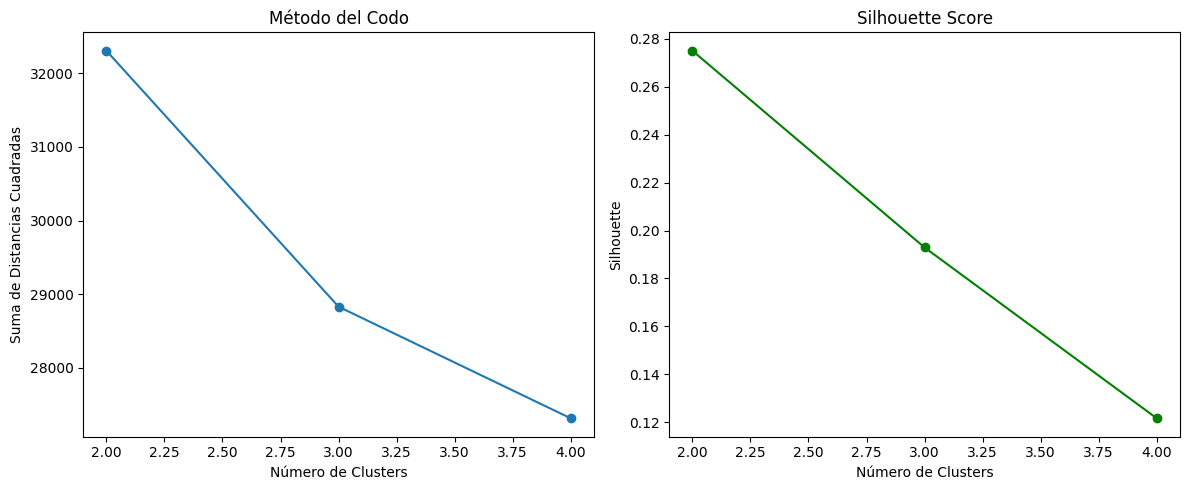

In [332]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, sum_of_squared_distances, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de Distancias Cuadradas')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette')

plt.tight_layout()
plt.show()


In [333]:
km = KMeans(n_clusters = 2)
y = km.fit_predict(df_customer_preprocesado)
print(silhouette_score(df_customer_preprocesado, y))
df_customer['k_means'] = y

0.27500002341999347


### Evaluación del modelo sin PCA

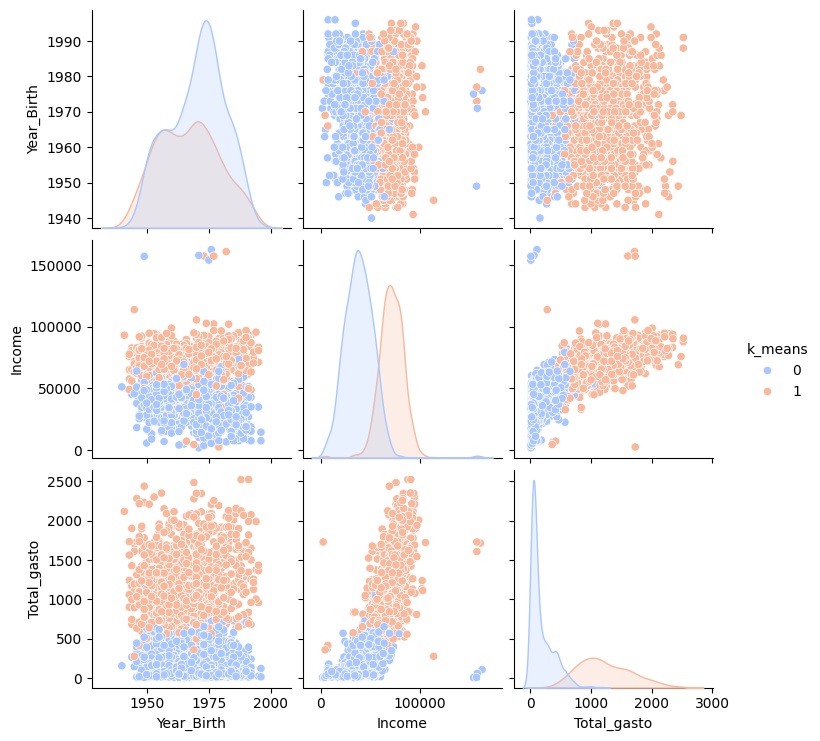

In [343]:
sns.pairplot(df_customer[['Year_Birth', 'Income', 'Total_gasto', 'k_means']], hue='k_means', palette='coolwarm')
plt.show();

### Modelo con PCA

In [344]:
pca = PCA()
pca.fit(df_customer_preprocesado)
pca_data_preprocesada = pca.transform(df_customer_preprocesado)
pca_data_preprocesada

array([[ 4.20211911e+00,  4.12746324e-02, -2.15638422e+00, ...,
        -4.11675330e-03, -2.60902411e-15,  5.53187000e-15],
       [-2.53936882e+00, -1.44104751e-01,  1.68232038e+00, ...,
        -1.36918551e-03,  6.66133815e-16,  3.01364534e-16],
       [ 1.88320816e+00, -3.44940099e-01, -1.27507903e-02, ...,
        -1.23652948e-04, -1.94289029e-15, -2.68139041e-15],
       ...,
       [ 1.57494386e+00, -9.51449526e-01,  4.38491672e-01, ...,
         2.62474633e-05,  6.99440506e-15,  8.40865125e-15],
       [ 2.04413887e+00,  7.94156312e-01,  1.86262005e+00, ...,
        -6.80485802e-04, -2.10942375e-15,  4.43376840e-16],
       [-1.84839900e+00,  1.76167846e+00,  4.47733444e-01, ...,
         2.71739623e-03, -3.21964677e-15, -1.28235749e-15]],
      shape=(2236, 34))

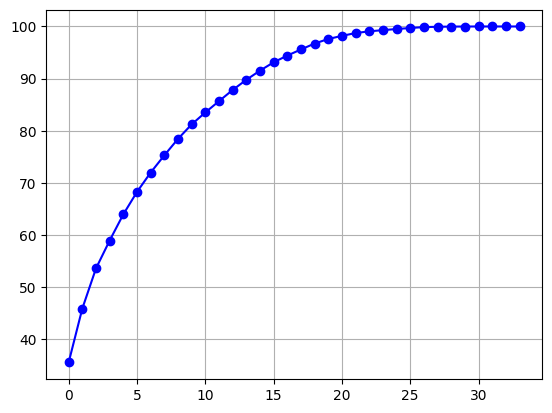

In [345]:
varianza = pca.explained_variance_ratio_
suma_acumulada = np.cumsum(np.round(varianza, decimals=4)*100)
plt.plot(suma_acumulada, 'b-o')
plt.grid()
plt.show();

In [346]:
pca_df_customer_preprocesado = pd.DataFrame(pca_data_preprocesada) # Crea un df con la data escalada
pca_df_customer_preprocesado.drop(columns=pca_df_customer_preprocesado.columns[11:], inplace=True)

In [347]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,5)

for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_df_customer_preprocesado)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_df_customer_preprocesado, y))

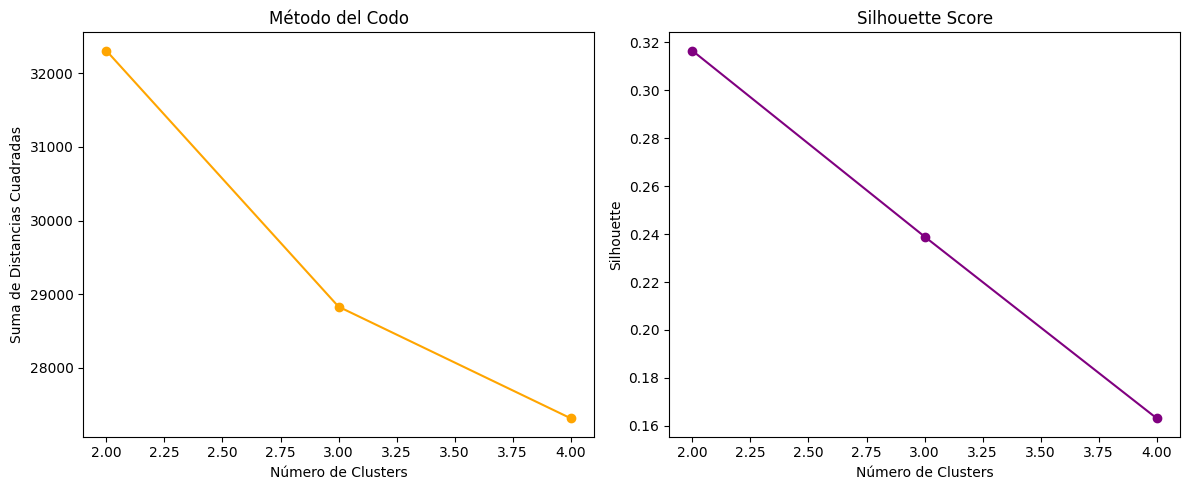

In [348]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, sum_of_squared_distances, marker='o', color='orange')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de Distancias Cuadradas')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='purple')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette')

plt.tight_layout()
plt.show()

In [349]:
pca_km = KMeans(n_clusters = 2)
y = pca_km.fit_predict(pca_df_customer_preprocesado)
print(silhouette_score(pca_df_customer_preprocesado, y))
df_customer['pca_k_means'] = y

0.3165212798880218


### Evaluación del modelo con PCA

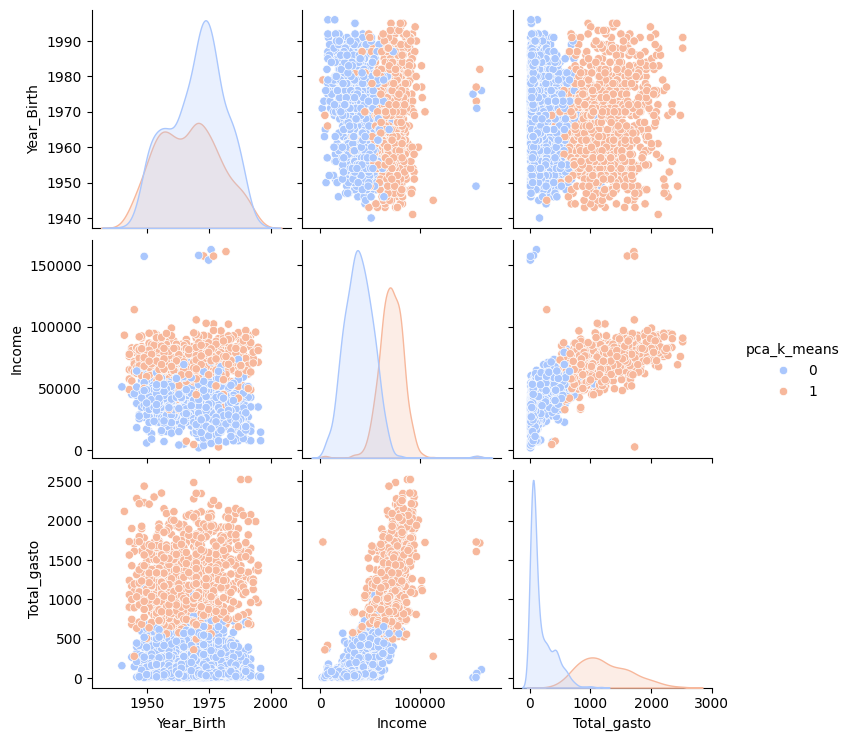

In [350]:
sns.pairplot(df_customer[['Year_Birth', 'Education', 'Income', 'Total_gasto', 'pca_k_means']], hue='pca_k_means', palette='coolwarm')
#sns.pairplot(df_customer[['Year_Birth', 'Income', 'Total_gasto', 'pca_k_means']], hue='pca_k_means', palette='coolwarm')
plt.show();